## DIP Assignment-4
### Name : Jayesh Rajesh Sutar

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [83]:
def read_image(path, isGrayScale=False):  # function to read images
    if isGrayScale:
        return cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    else:
        image = cv2.imread(path)
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return rgb_image

### Task 2

In [84]:
def binary_thresholding(image, threshold):  
    binary_image = np.where(image > threshold, 255, 0).astype(np.uint8)
    return binary_image

def adaptive_thresholding(image, block_size, C): 
    ## Applies mean filter on image
    kernel = np.ones((block_size, block_size), dtype=np.float32) / (block_size ** 2)
    mean_image = cv2.filter2D(image.astype(np.float32), -1, kernel, borderType=cv2.BORDER_REFLECT)

    ## calculates local thresholds
    threshold = mean_image - C
    adaptive_image = np.where(image > threshold, 255, 0).astype(np.uint8)
    return adaptive_image

def otsu_thresholding(image):
    # Compute Image histgrams
    pixel_counts, bin_edges = np.histogram(image, bins=256, range=(0, 256))
    total_pixels = image.size
    probabilities = pixel_counts / total_pixels

    # Cumulative sums and means
    cumulative_weights = np.cumsum(probabilities)
    cumulative_means = np.cumsum(np.arange(256) * probabilities)
    total_mean = cumulative_means[-1]

    # Calculates between-class variance for all thresholds
    numerator = (total_mean * cumulative_weights - cumulative_means) ** 2
    denominator = cumulative_weights * (1 - cumulative_weights)
    ## To handle Division by Zero
    with np.errstate(divide='ignore', invalid='ignore'):  
        between_class_variance = np.nan_to_num(numerator / denominator)

    # threshold that maximizes the between-class variance
    threshold = np.argmax(between_class_variance)
    otsu_image = np.where(image > threshold, 255, 0).astype(np.uint8)
    
    return otsu_image


In [85]:
flower_img = read_image('../images/flower.jpeg',isGrayScale=True)

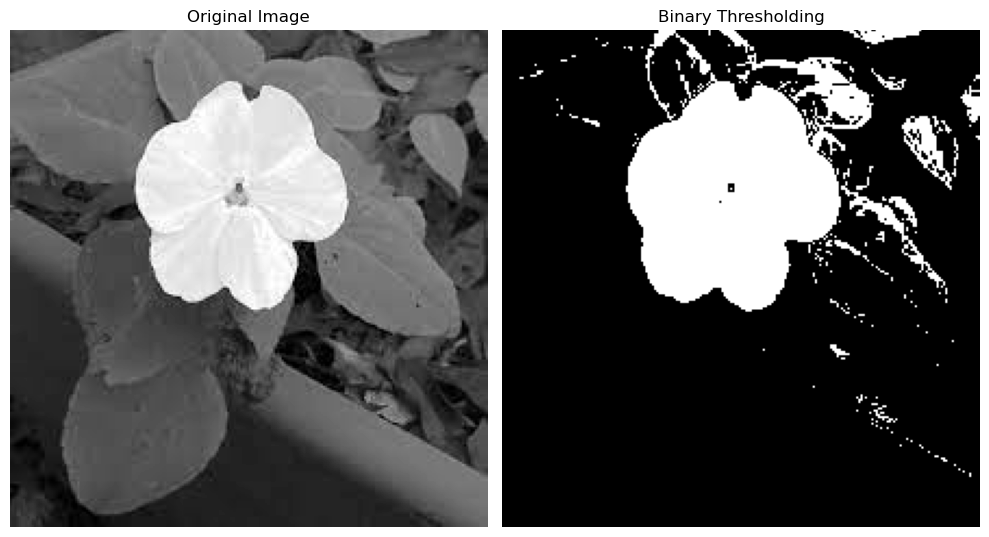

In [86]:
binary_thresholded = binary_thresholding(flower_img, 128)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(flower_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Binary Thresholding")
plt.imshow(binary_thresholded, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

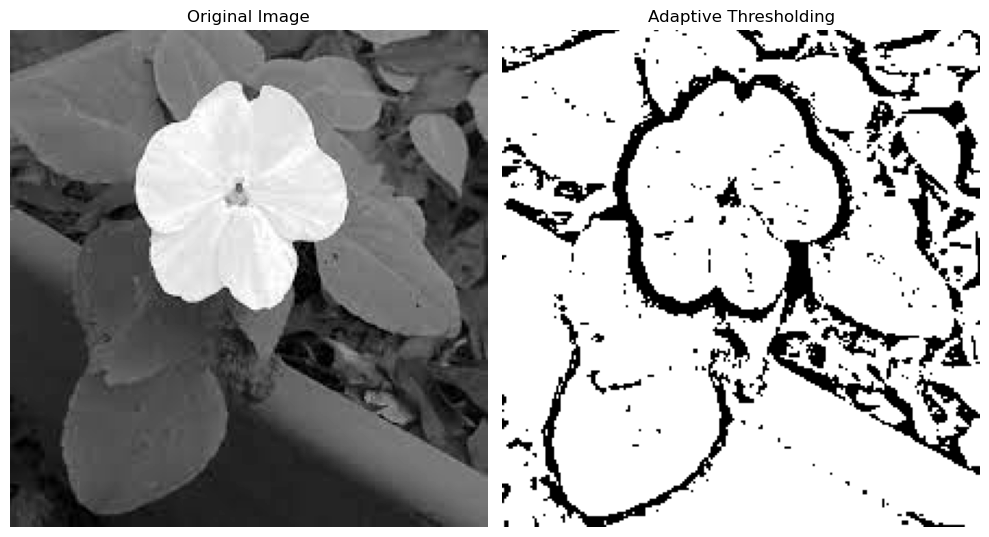

In [87]:
adaptive_thresholded = adaptive_thresholding(flower_img, block_size=15, C=10)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(flower_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Adaptive Thresholding")
plt.imshow(adaptive_thresholded, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

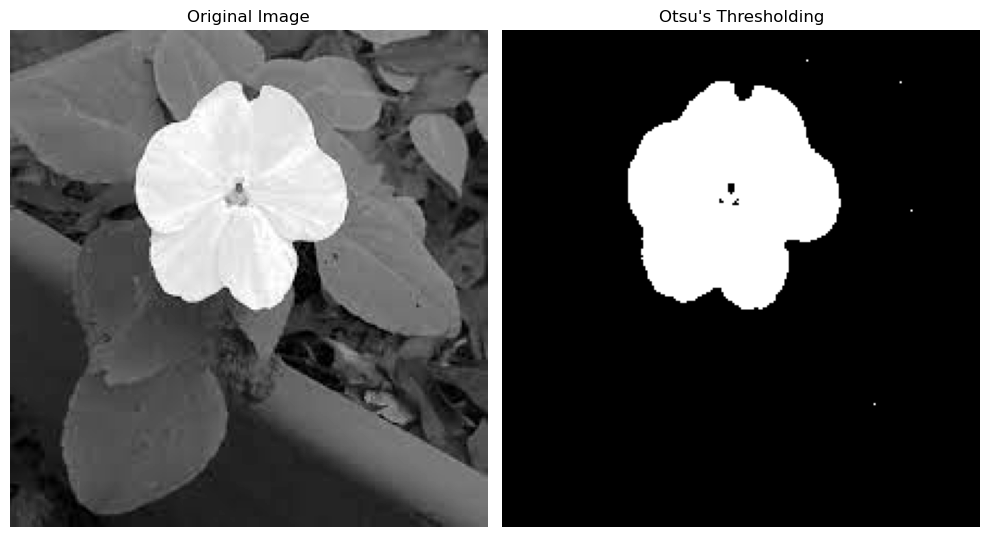

In [88]:
otsu_thresholded = otsu_thresholding(flower_img)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(flower_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Otsu's Thresholding")
plt.imshow(otsu_thresholded, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

From the above observations, We can see that Ostu's Thresholding is best among all in terms of both object boundary and noise levels. Adaptive Thresholding is better in terms of local features but it results in higher noise.

### Task 2

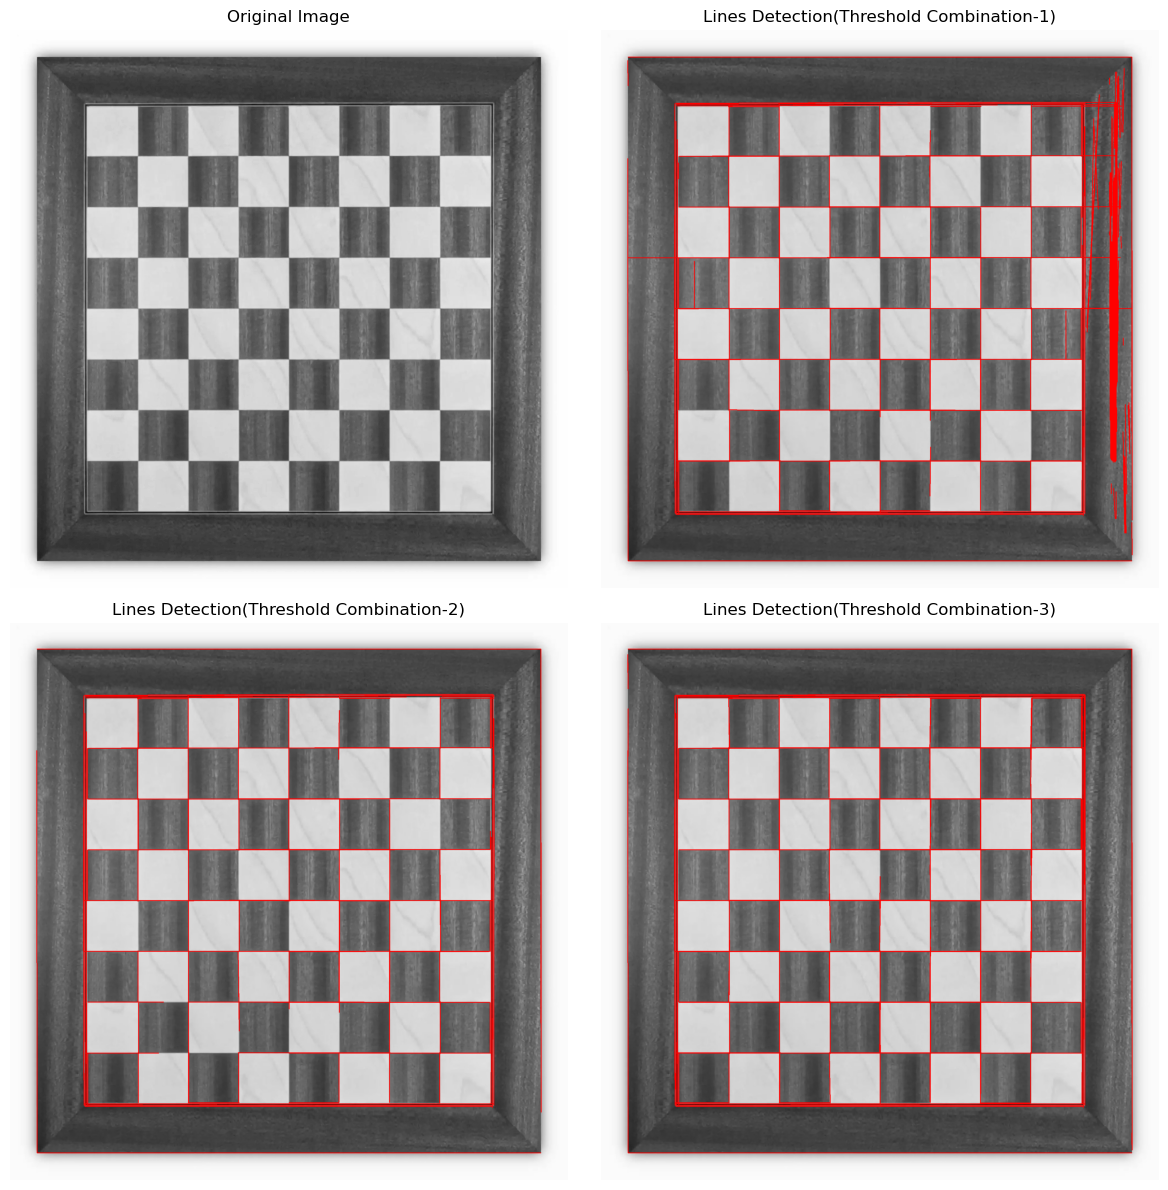

In [89]:
def detect_and_highlight_lines(image, canny_threshold1, canny_threshold2, hough_threshold, min_line_length, max_line_gap):
    # Canny edge detector and Hough Line transform
    edges = cv2.Canny(image, canny_threshold1, canny_threshold2)
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi / 180, threshold=hough_threshold,
                            minLineLength=min_line_length, maxLineGap=max_line_gap)
    
    result = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    ## Line Plotting on original image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(result, (x1, y1), (x2, y2), (255, 0, 0), 2) 
    
    return result


chessboard_img = read_image('../images/chess_board.jpg', True)

highlighted_image_comb1 = detect_and_highlight_lines(chessboard_img, 
                                                      canny_threshold1=20, 
                                                      canny_threshold2=100, 
                                                      hough_threshold=100, 
                                                      min_line_length=10, 
                                                      max_line_gap=80)

highlighted_image_comb2 = detect_and_highlight_lines(chessboard_img, 
                                                      canny_threshold1=35, 
                                                      canny_threshold2=200, 
                                                      hough_threshold=100, 
                                                      min_line_length=10, 
                                                      max_line_gap=80)

highlighted_image_comb3 = detect_and_highlight_lines(chessboard_img, 
                                                      canny_threshold1=35, 
                                                      canny_threshold2=200, 
                                                      hough_threshold=40, 
                                                      min_line_length=10, 
                                                      max_line_gap=150)

# Plot the results
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(chessboard_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Lines Detection(Threshold Combination-1)")
plt.imshow(highlighted_image_comb1)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Lines Detection(Threshold Combination-2)")
plt.imshow(highlighted_image_comb2)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Lines Detection(Threshold Combination-3)")
plt.imshow(highlighted_image_comb3)
plt.axis('off')

plt.tight_layout()
plt.show()


Here I have showed three results from three different combinations of parametners.From this I observed following:
- For both **Canny thresholds**, with low values results in more edges being detected but it can also include noise. A moderate values results in more prominent edges. 
- For **Hough threshold** low values results in more lines being detected but it can include short lines.higher values results in longer, continous lines.
- **Min Line Length** represents minimum length of line segment to be considered as line.**Max Line Gap** controls maximum gap that can be allowed between two line segments to be considered as a single line. 

### Task 3

In [90]:
def detect_circles(image, dp, min_dist, param1, param2, min_radius, max_radius):
    ## Image bluring followed by hough Circle Tranform
    blurred_image = cv2.GaussianBlur(image, (9, 9), 1.5)
    circles = cv2.HoughCircles(blurred_image, cv2.HOUGH_GRADIENT, dp=dp, minDist=min_dist,
                               param1=param1, param2=param2, minRadius=min_radius, maxRadius=max_radius)

    result = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    ## Draw circle on original image
    if circles is not None:
        circles = np.uint16(np.around(circles))  
        for circle in circles[0, :]:
            x, y, radius = circle
            cv2.circle(result, (x, y), radius, (0, 255, 0), 12) 
    
    return result

In [91]:
coin_img = read_image('../images/coin-detection.jpg', True)

In [92]:
highlighted_image_comb1 = detect_circles(coin_img, dp=1.2, min_dist=500,
                                                     param1=50, param2=30,
                                                     min_radius=100, max_radius=200)

In [93]:
highlighted_image_comb2 = detect_circles(coin_img, dp=1.2, min_dist=500,
                                                     param1=50, param2=50,
                                                     min_radius=200, max_radius=400)

In [94]:
highlighted_image_comb3 = detect_circles(coin_img, dp=1.2, min_dist=800,
                                                     param1=90, param2=50,
                                                     min_radius=300, max_radius=400)

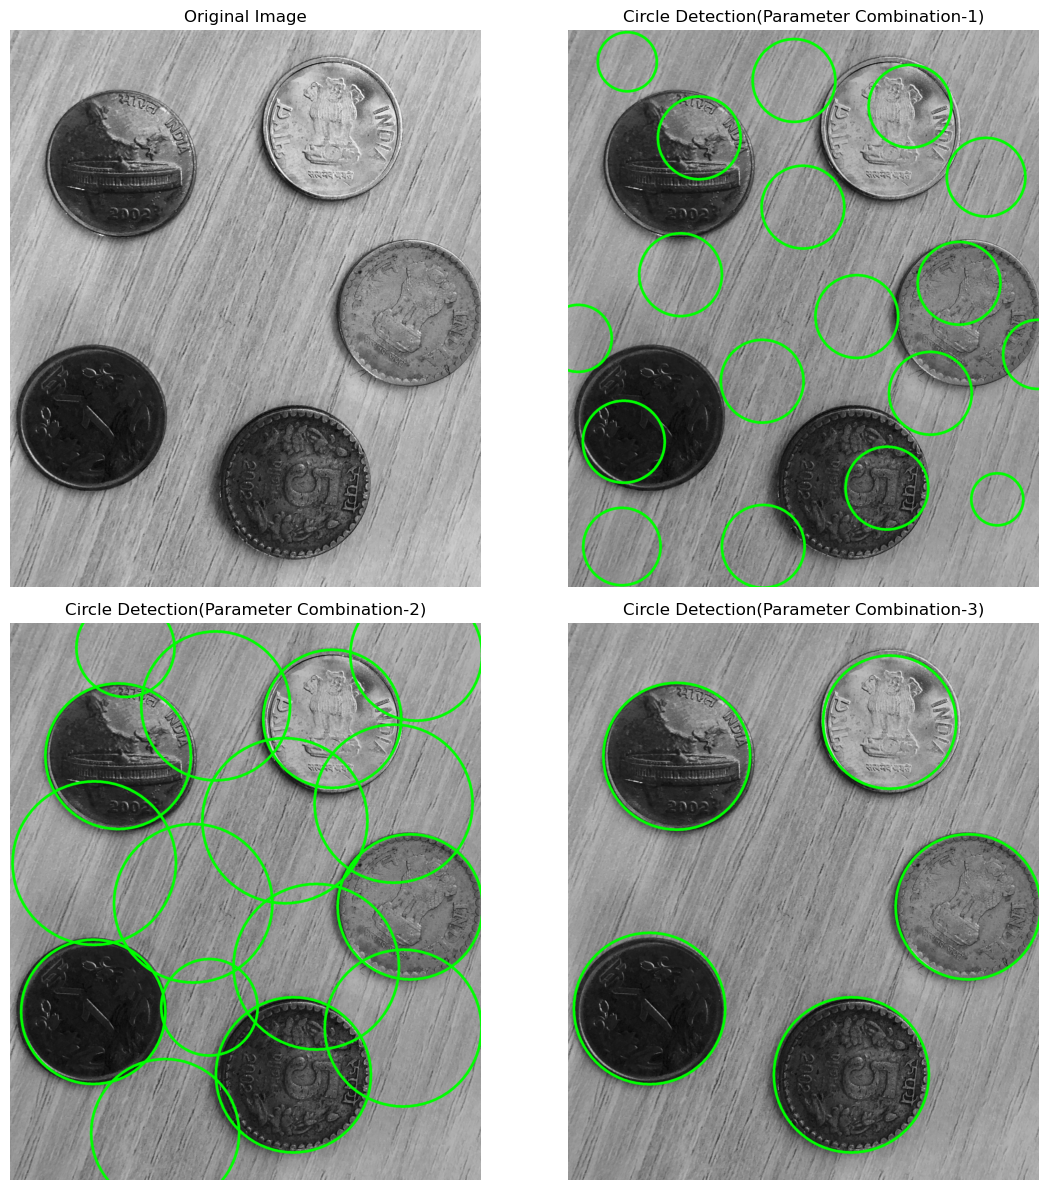

In [95]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(coin_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Circle Detection(Parameter Combination-1)")
plt.imshow(highlighted_image_comb1)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Circle Detection(Parameter Combination-2)")
plt.imshow(highlighted_image_comb2)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Circle Detection(Parameter Combination-3)")
plt.imshow(highlighted_image_comb3)
plt.axis('off')

plt.tight_layout()
plt.show()

Here I have used three combinations of parameters. I observed significant improvement while trying different combinations.
- In combination-1 there are false detections. I changed param2,min and max radius limit and got better result in combination-2. 
- All circles got detected in combination-2 but still there are false detection.
- I changed param1 and got best results in combination-3 with all circle being detected correctly and no other false detections.

### Task 4

In [96]:
def detect_and_mark_corners(image, block_size, ksize, k, threshold):
    # Harris Corner Detection
    corners = cv2.cornerHarris(image, block_size, ksize, k)
    corners_normalized = cv2.normalize(corners, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    ## Mark Corners in given image
    result = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    result[corners_normalized > threshold] = [255, 0, 0]  
    
    return result, corners_normalized

In [97]:
building_img = read_image('../images/building.jpg',True)

In [98]:
marked_image_comb1, _ = detect_and_mark_corners(building_img, block_size=5, 
                                                ksize=5, k=0.05, threshold=120)

marked_image_comb2, _ = detect_and_mark_corners(building_img, block_size=5, 
                                                ksize=15, k=0.01, threshold=65)

marked_image_comb3, _ = detect_and_mark_corners(building_img, block_size=5, 
                                                ksize=11, k=0.02, threshold=65)

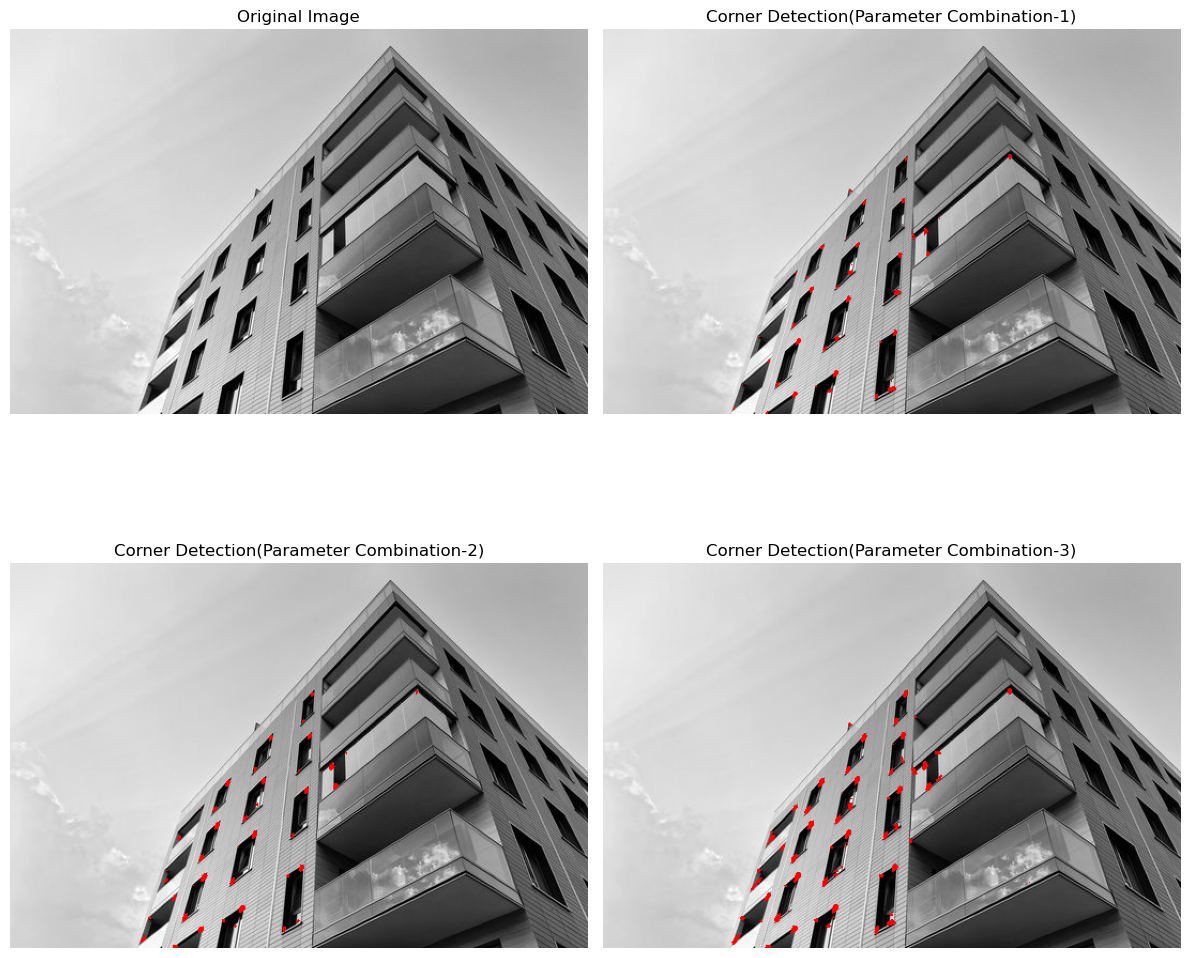

In [99]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(building_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Corner Detection(Parameter Combination-1)")
plt.imshow(marked_image_comb1)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Corner Detection(Parameter Combination-2)")
plt.imshow(marked_image_comb2)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Corner Detection(Parameter Combination-3)")
plt.imshow(marked_image_comb3)
plt.axis('off')

plt.tight_layout()
plt.show()


I tried 3 combinations of parameters with different k values:
- First with larger k(=0.05), small kernel size and high threshold.
- In second case tried k=0.01 with small threshold and In last case tried k=0.02 with small threshold. 
- From this we can say that k is a sensitivity parameter, A larger k with small threshold results in more spreaded detection,with high threshold it works better.

### Task 5:
The Hough Transform for lines and circles operates on different principles due to their geometric representations.

For lines, it maps points from the image to a 2D parameter space defined by angle 
𝜃 and distance r from the origin. Each edge pixel votes for all lines passing through it, forming sinusoidal curves in the parameter space. The intersections of these curves identify potential lines.

For circles, a 3D parameter space is needed to account for the circle's center coordinates
(x,y) and radius r. Each edge pixel votes for all circles that could pass through it, creating a much larger and computationally intensive parameter space.
Detecting circles is inherently more complex than lines due to the additional parameter (r), requiring more memory and computation. Lines are simpler, as only two parameters need to be optimized, making line detection faster and more efficient.